# Prophet

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from prophet import Prophet
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9)

## Avarage temperature

**Read Data**

In [2]:
train_path = 'https://raw.githubusercontent.com/mirpulatov/CS_MSU/main/Course%20Work/data/tavg/train_1d.csv'
test_path = 'https://raw.githubusercontent.com/mirpulatov/CS_MSU/main/Course%20Work/data/tavg/test_1d.csv'
full_path = 'https://raw.githubusercontent.com/mirpulatov/CS_MSU/main/Course%20Work/data/tavg/full_1d.csv'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
full_data = pd.read_csv(full_path)
train_data = train_data.rename(columns={"date": "ds", "tavg": "y"})
test_data = test_data.rename(columns={"date": "ds", "tavg": "y"})
full_data = full_data.rename(columns={"date": "ds", "tavg": "y"})

In [3]:
display(train_data.tail(), train_data.shape)
display(test_data.tail(), test_data.shape)
display(full_data.tail(), full_data.shape)

,ds,y
1456,2014-12-27,-11.009583
1457,2014-12-28,-8.670417
1458,2014-12-29,-12.425000
1459,2014-12-30,-12.416667
1460,2014-12-31,-15.542917


(1461, 2)

,ds,y
360,2015-12-27,-0.182083
361,2015-12-28,-6.087917
362,2015-12-29,-7.438750
363,2015-12-30,-8.530417
364,2015-12-31,-10.928333


(365, 2)

,ds,y
1821,2015-12-27,-0.182083
1822,2015-12-28,-6.087917
1823,2015-12-29,-7.438750
1824,2015-12-30,-8.530417
1825,2015-12-31,-10.928333


(1826, 2)

**Model**

In [4]:
model = Prophet()
model.fit(train_data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1821,2015-12-27,-4.598923,-10.236237,0.755397
1822,2015-12-28,-4.584965,-10.201305,0.472609
1823,2015-12-29,-4.627482,-10.179127,0.854730
1824,2015-12-30,-4.480616,-9.441474,1.414226
1825,2015-12-31,-4.334746,-9.936248,0.843708


**Test data**

In [6]:
test_data['yhat'] = forecast[-365:].yhat.to_numpy()
test_data['yhat_lower'] = forecast[-365:].yhat_lower.to_numpy()
test_data['yhat_upper'] = forecast[-365:].yhat_upper.to_numpy()

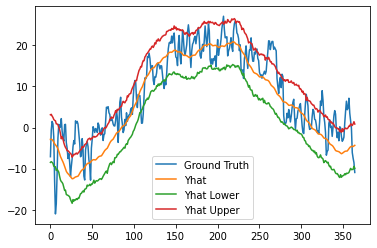

In [7]:
test_data.y.plot();
test_data.yhat.plot();
test_data.yhat_lower.plot();
test_data.yhat_upper.plot();
plt.legend(["Ground Truth", "Yhat", "Yhat Lower", "Yhat Upper"]);

**Full data**

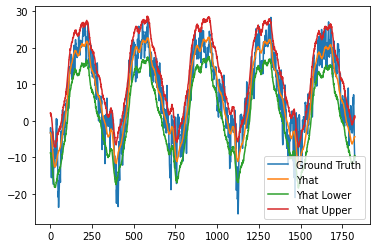

In [8]:
full_data.y.plot();
forecast.yhat.plot();
forecast.yhat_lower.plot();
forecast.yhat_upper.plot();
plt.legend(["Ground Truth", "Yhat", "Yhat Lower", "Yhat Upper"]);